![IPL EDA](image.png)

Dataset Description – IPL Match Data

The dataset used in this project contains detailed information about Indian Premier League (IPL) cricket matches played across multiple seasons. Each row in the dataset represents one IPL match, and the columns describe match conditions, teams, outcomes, and officials involved.

This dataset is suitable for regression and predictive analytics, particularly for analyzing match outcomes such as win by runs or win by wickets.

                                                    IMPORT LIBRARIES

In [56]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


                                                   LOAD THE DATA SET

🔹 Key Features in the Dataset

1️⃣ Match Information
id – Unique identifier for each match
season – Year in which the IPL season was conducted
city – City where the match was played
venue – Stadium where the match took place

2️⃣ Team Details
team1 – First team participating in the match
team2 – Second team participating in the match
toss_winner – Team that won the toss
toss_decision – Decision taken after winning the toss (bat/field)

3️⃣ Match Outcome Variables
winner – Team that won the match
result – Type of match result (normal, tie, no result)
win_by_runs – Number of runs by which the batting team won (target variable for regression)
win_by_wickets – Number of wickets by which the chasing team won
dl_applied – Indicates whether the Duckworth–Lewis method was applied (1 = Yes, 0 = No)
4️⃣ Officials Information
umpire1, umpire2 – On-field umpires for the match

In [57]:
# Load CSV file
df = pd.read_csv('matches.csv')  # Replace with your dataset path
# Display first 5 rows
df.head()


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


                                                 TO CHECK THE NO.OF ROWS AND COLUMNS

In [58]:
# Shape of dataset
df.shape


(756, 18)

                                                TO GET THE INFORMATION

In [59]:
# Info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

                                               Statistical summary of numerical columns

In [60]:
# Statistical summary of numerical columns
df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


                                              TO CHECK MISSING VALUES

In [61]:
# Check for missing values
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [62]:
# Check column names
df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

                                                   TO DROP THE NULL VALUES

In [63]:
df.dropna(inplace=True)


In [64]:
df = df.drop(columns=['umpire3'])
# Fill categorical missing values with mode
df['city'].fillna(df['city'].mode()[0], inplace=True)
df['winner'].fillna(df['winner'].mode()[0], inplace=True)
df['player_of_match'].fillna(df['player_of_match'].mode()[0], inplace=True)

In [65]:
# Check for missing values
df.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [66]:
df.duplicated().sum()

np.int64(0)

                                                         TO DROP DUPLICATES

In [67]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

                                                   NOW DO UNIVARIATE ANALYSIS

TO GET CATEGORICAL COLUMNS

In [68]:
# get categorical columns
cat_col = df.select_dtypes(include='O').columns
cat_col

Index(['city', 'date', 'team1', 'team2', 'toss_winner', 'toss_decision',
       'result', 'winner', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

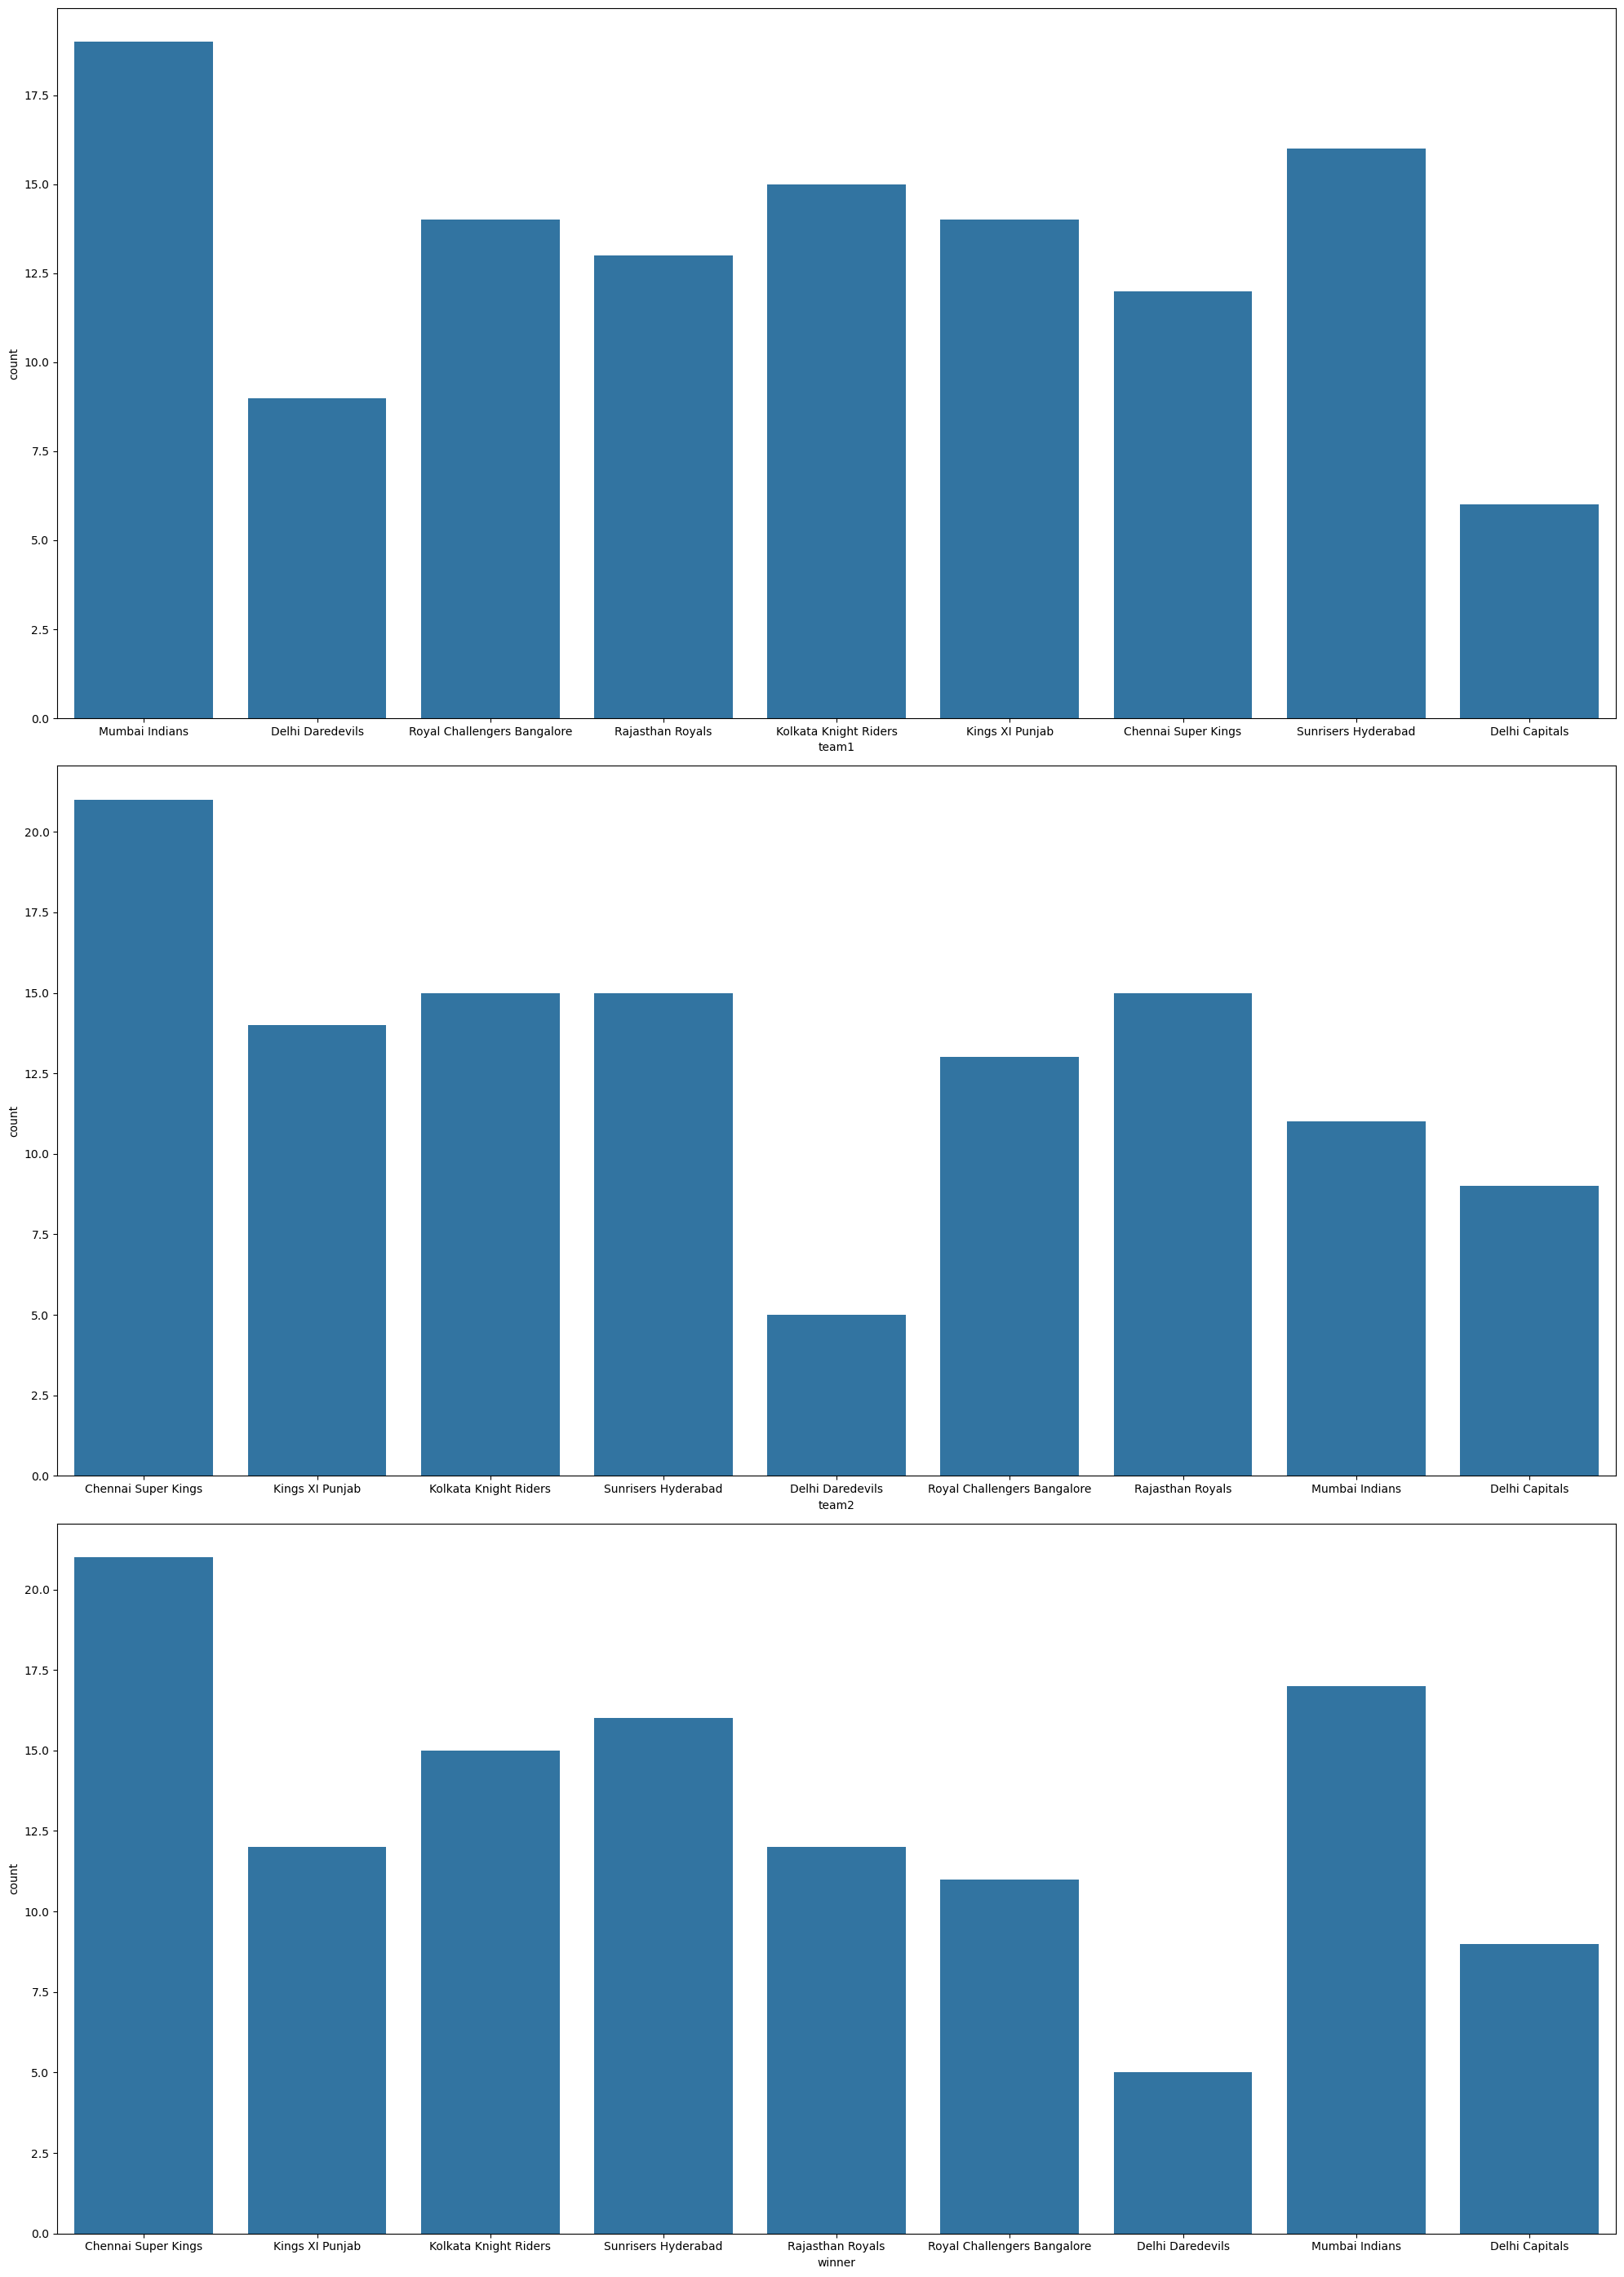

In [69]:
fig, ax = plt.subplots(3, 1, figsize=(20, 28))

sns.countplot(x='team1', data=df, ax=ax[0])
sns.countplot(x='team2', data=df, ax=ax[1])
sns.countplot(x='winner', data=df, ax=ax[2])

plt.tight_layout()
plt.show()

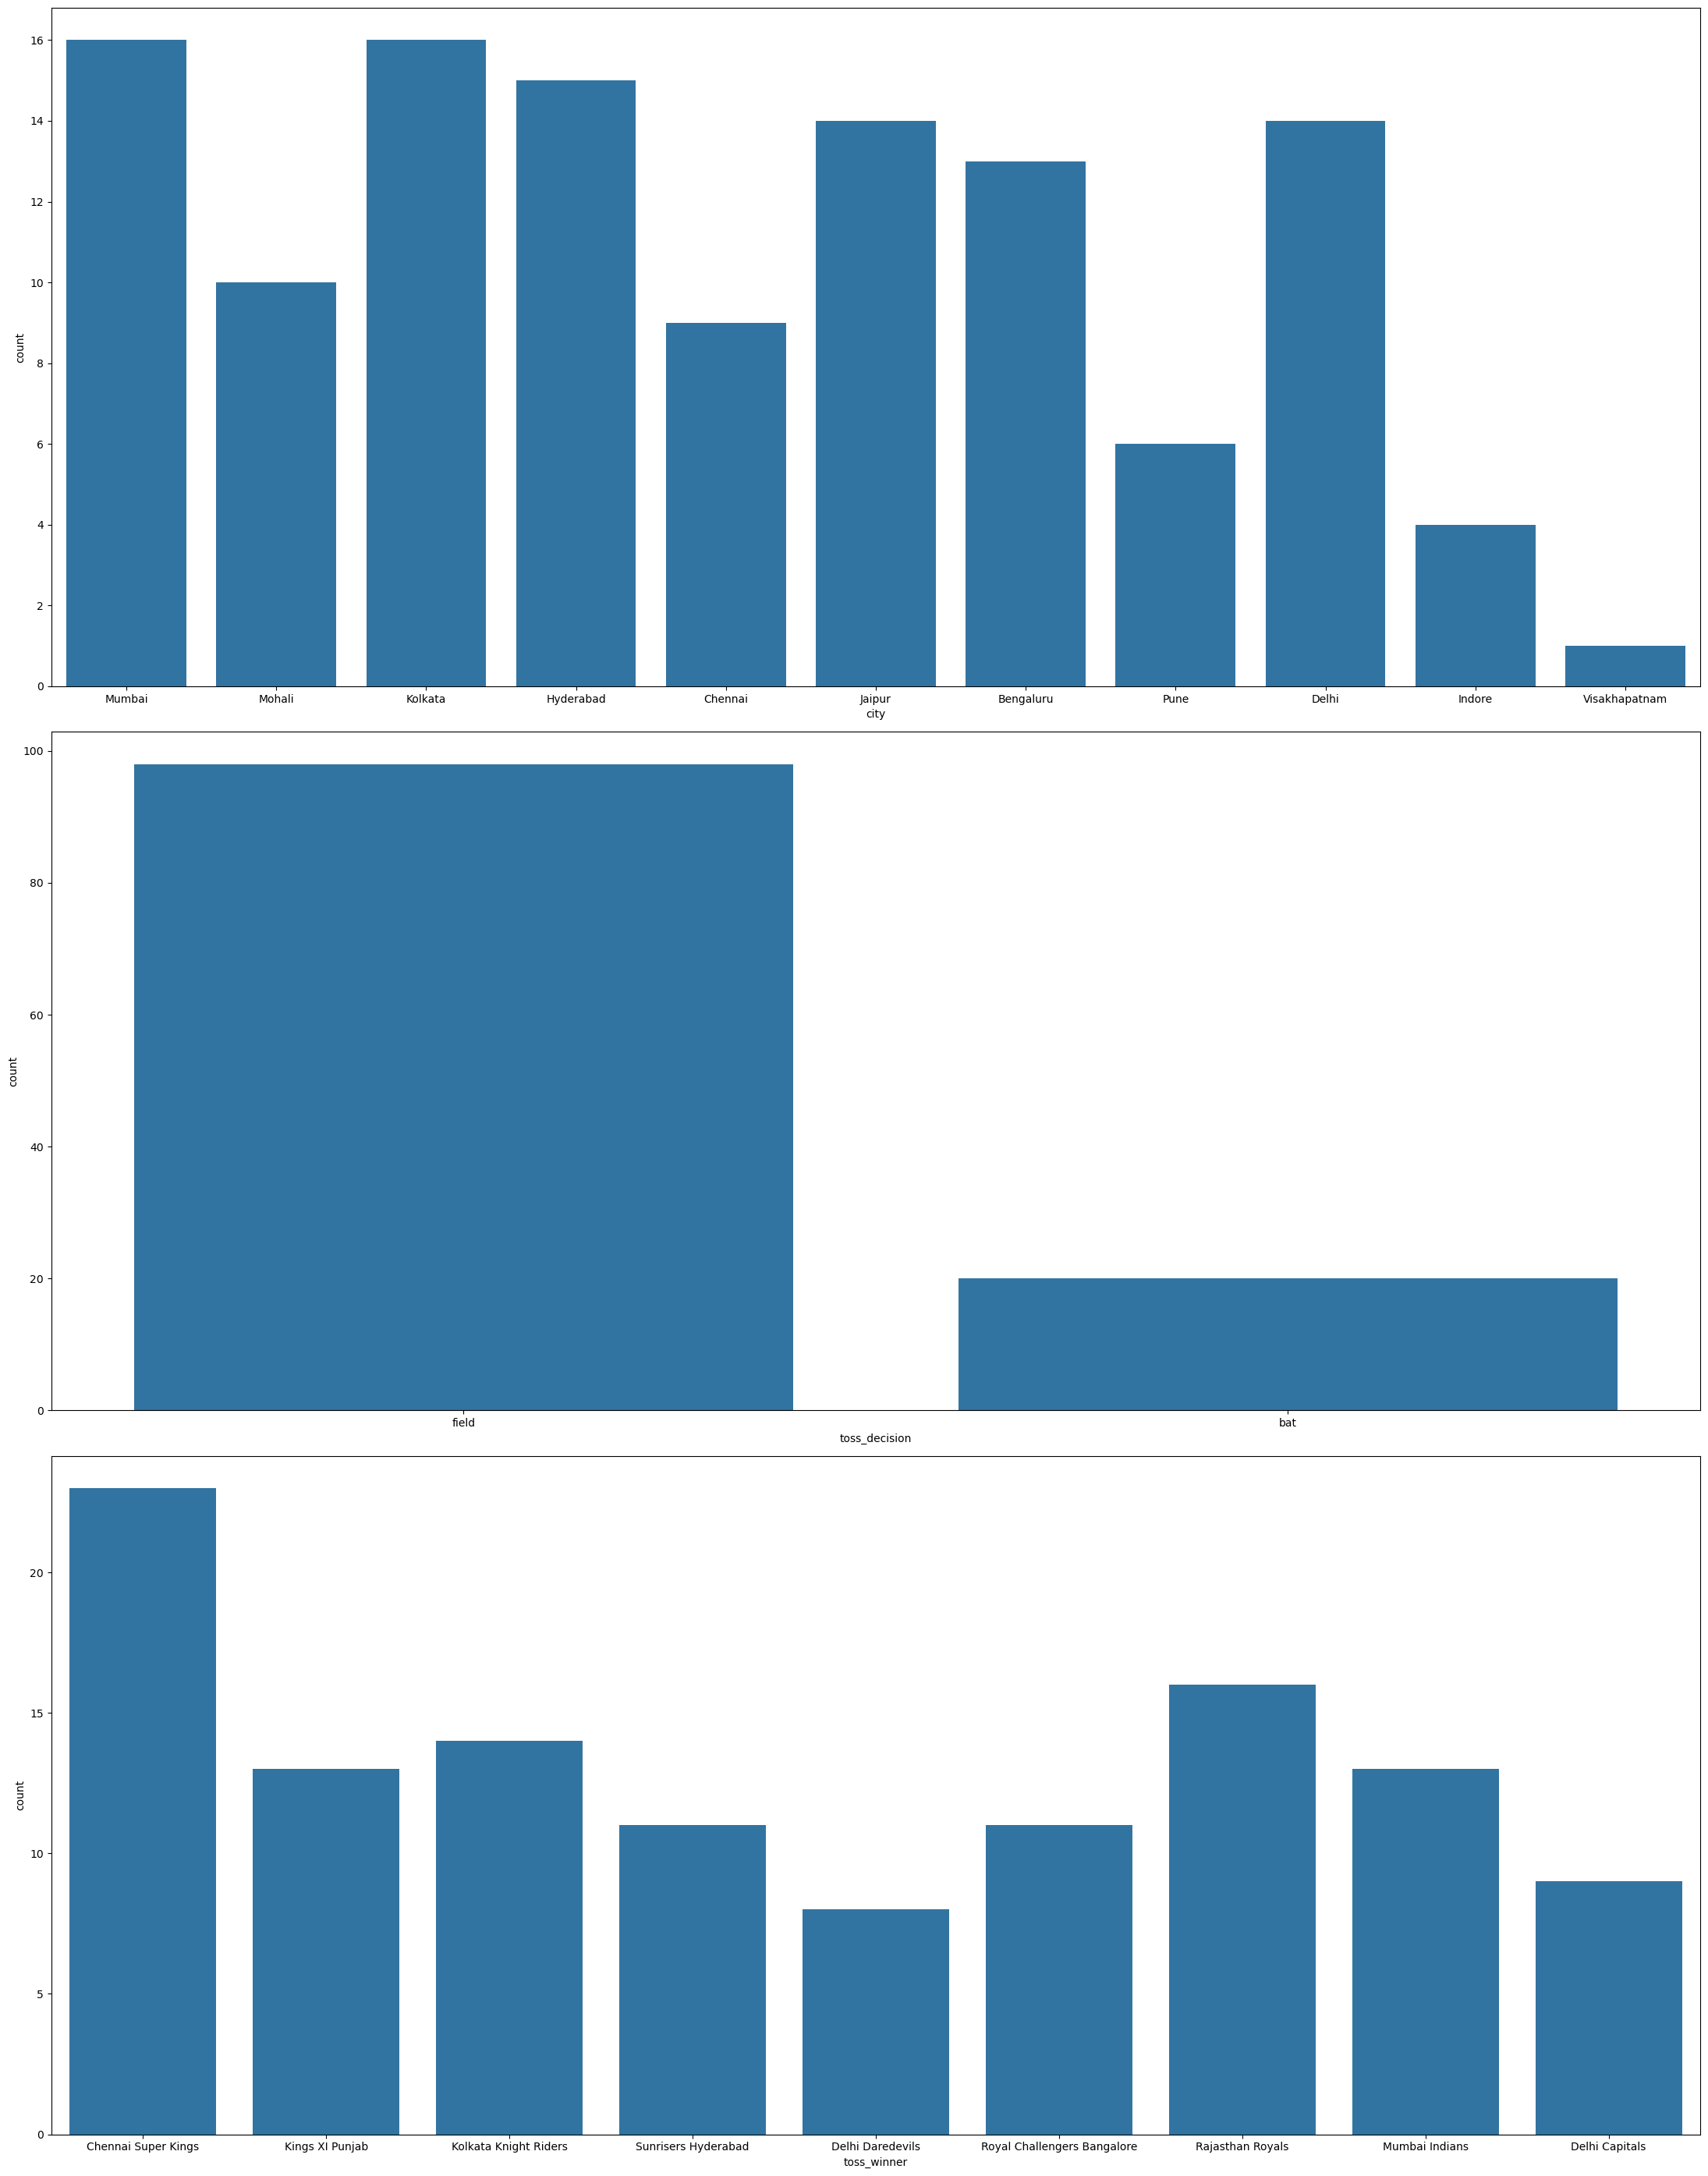

In [70]:
fig, ax = plt.subplots(3, 1, figsize=(22, 28))
sns.countplot(x='city', data=df, ax=ax[0])
sns.countplot(x='toss_decision', data=df, ax=ax[1])
sns.countplot(x='toss_winner', data=df, ax=ax[2])
plt.tight_layout()
plt.show()

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, 636 to 755
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               118 non-null    int64 
 1   season           118 non-null    int64 
 2   city             118 non-null    object
 3   date             118 non-null    object
 4   team1            118 non-null    object
 5   team2            118 non-null    object
 6   toss_winner      118 non-null    object
 7   toss_decision    118 non-null    object
 8   result           118 non-null    object
 9   dl_applied       118 non-null    int64 
 10  winner           118 non-null    object
 11  win_by_runs      118 non-null    int64 
 12  win_by_wickets   118 non-null    int64 
 13  player_of_match  118 non-null    object
 14  venue            118 non-null    object
 15  umpire1          118 non-null    object
 16  umpire2          118 non-null    object
dtypes: int64(5), object(12)
memory usage: 

In [72]:
# get categorical columns
num_col = df.select_dtypes(include=['int64','float64']).columns
num_col

Index(['id', 'season', 'dl_applied', 'win_by_runs', 'win_by_wickets'], dtype='object')

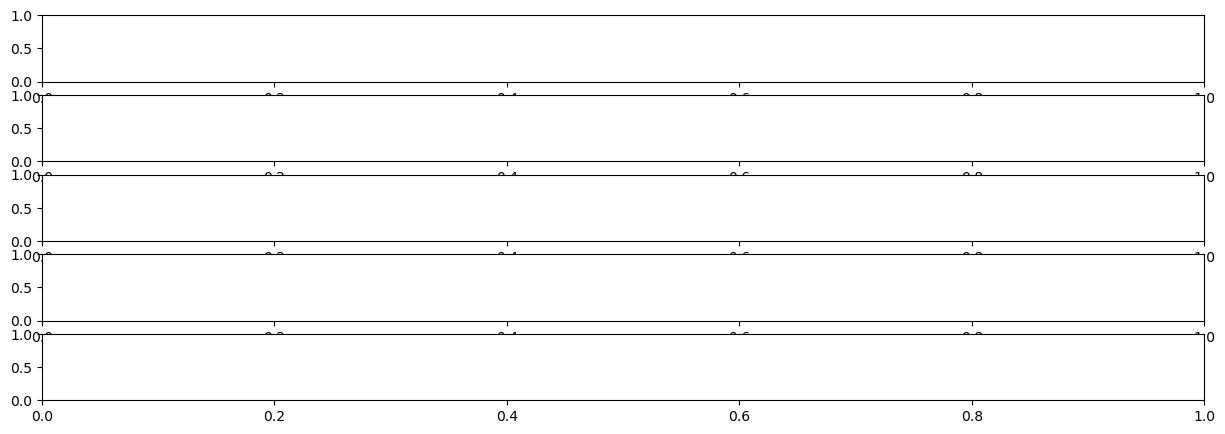

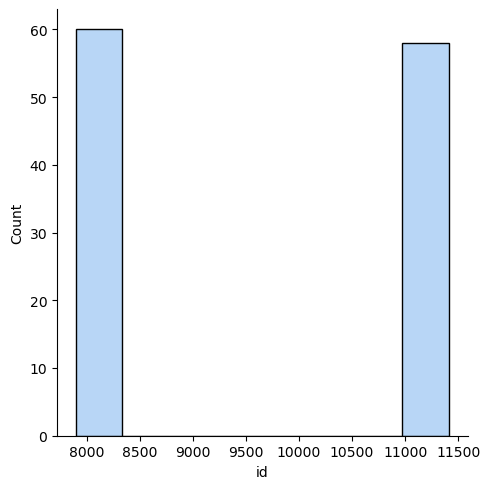

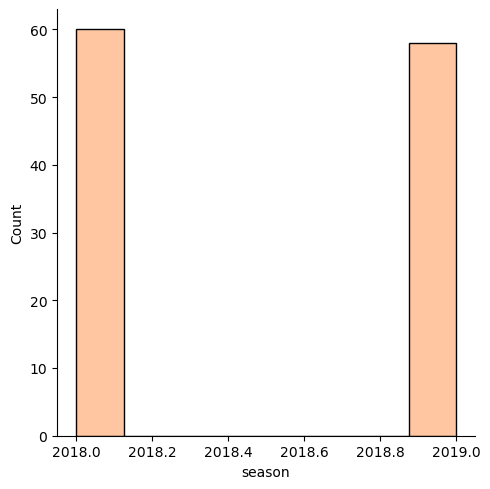

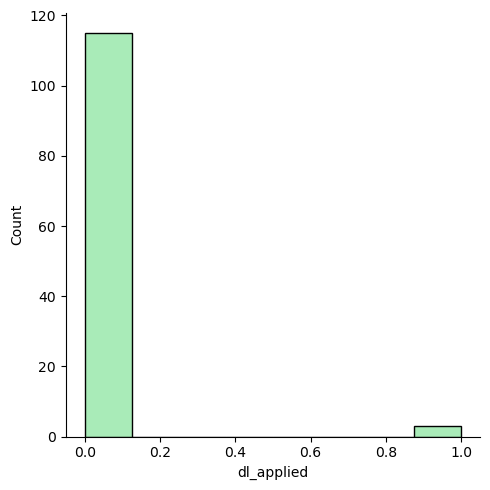

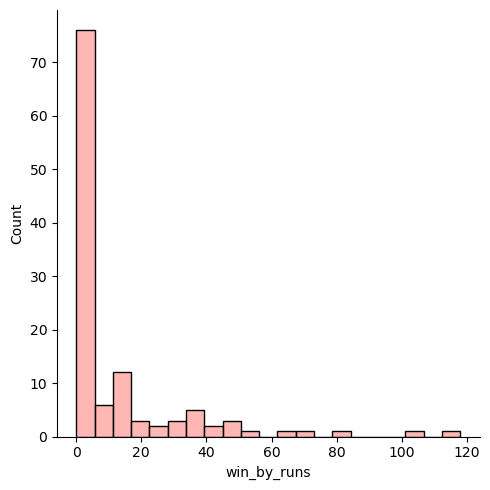

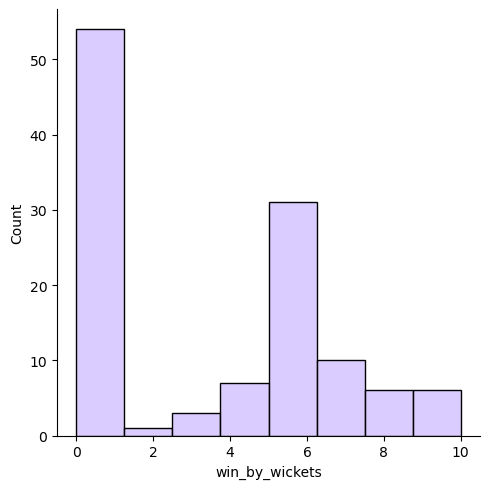

In [73]:
# lets get distplot on numerical columns
color = sns.color_palette('pastel')
fig, ax = plt.subplots(5,1, figsize=(15, 5))
sns.displot(df['id'], ax=ax[0], color=color[0])
sns.displot(df['season'], ax=ax[1], color=color[1])
sns.displot(df['dl_applied'], ax=ax[2], color=color[2])
sns.displot(df['win_by_runs'], ax=ax[3], color=color[3])
sns.displot(df['win_by_wickets'], ax=ax[4], color=color[4])
plt.show()

In [74]:
df[df['season'] == 2019][['date', 'team1', 'team2', 'winner']]

,date,team1,team2,winner
696,23/03/19,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings
697,24/03/19,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders
698,24/03/19,Delhi Capitals,Mumbai Indians,Delhi Capitals
699,25/03/19,Kings XI Punjab,Rajasthan Royals,Kings XI Punjab
700,26/03/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings
701,27/03/19,Kolkata Knight Riders,Kings XI Punjab,Kolkata Knight Riders
702,28/03/19,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians
703,29/03/19,Rajasthan Royals,Sunrisers Hyderabad,Sunrisers Hyderabad
704,30/03/19,Mumbai Indians,Kings XI Punjab,Kings XI Punjab
705,30/03/19,Kolkata Knight Riders,Delhi Capitals,Delhi Capitals


In [75]:
df[df['season'] == 2019]['winner'].unique()

array(['Chennai Super Kings', 'Kolkata Knight Riders', 'Delhi Capitals',
       'Kings XI Punjab', 'Mumbai Indians', 'Sunrisers Hyderabad',
       'Rajasthan Royals', 'Royal Challengers Bangalore'], dtype=object)

In [76]:
df[df['season'] == 2019]['winner'].value_counts()

winner
Mumbai Indians                 11
Chennai Super Kings            10
Delhi Capitals                  9
Kolkata Knight Riders           6
Kings XI Punjab                 6
Sunrisers Hyderabad             6
Rajasthan Royals                5
Royal Challengers Bangalore     5
Name: count, dtype: int64

In [77]:
df[df['season'] == 2019]['winner'].value_counts().idxmax()

'Mumbai Indians'

In [78]:
df[(df['season'] == 2019) & (df['winner'] == 'Mumbai Indians')]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
702,11143,2019,Bengaluru,28/03/19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Mumbai Indians,6,0,JJ Bumrah,M. Chinnaswamy Stadium,S Ravi,O Nandan
710,11151,2019,Mumbai,03/04/19,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,37,0,HH Pandya,Wankhede Stadium,Bruce Oxenford,Rod Tucker
714,11310,2019,Hyderabad,06/04/19,Mumbai Indians,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Mumbai Indians,40,0,A Joseph,Rajiv Gandhi Intl. Cricket Stadium,Anil Dandekar,Nitin Menon
719,11315,2019,Mumbai,10/04/19,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,3,KA Pollard,Wankhede Stadium,Yeshwant Barde,S Ravi
726,11322,2019,Mumbai,15/04/19,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,5,SL Malinga,Wankhede Stadium,Marais Erasmus,Nitin Menon
729,11325,2019,Delhi,18/04/19,Mumbai Indians,Delhi Capitals,Mumbai Indians,bat,normal,0,Mumbai Indians,40,0,HH Pandya,Feroz Shah Kotla Ground,Nigel Llong,Bruce Oxenford
739,11335,2019,Chennai,26/04/19,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,46,0,RG Sharma,M. A. Chidambaram Stadium,Nigel Llong,Anil Chaudhary
746,11342,2019,Mumbai,02/05/19,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,tie,0,Mumbai Indians,0,0,JJ Bumrah,Wankhede Stadium,S Ravi,O Nandan
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon


In [79]:
year = 2019
df_year = df[df['season'] == year]

Bar Graph – Matches Won by Each Team

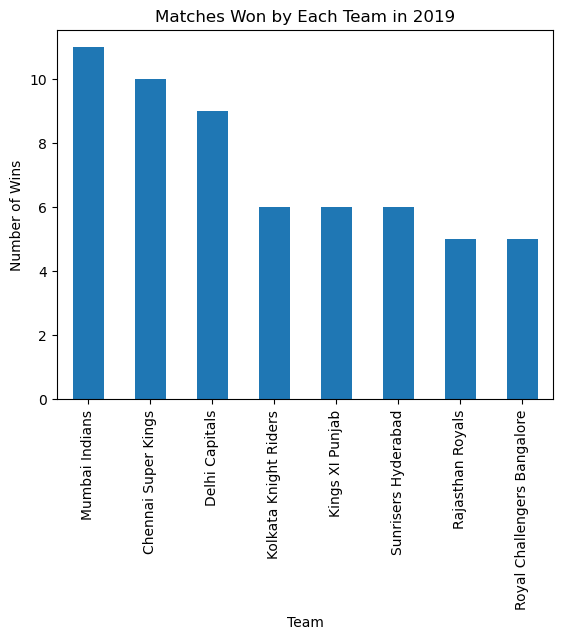

In [80]:
import matplotlib.pyplot as plt

wins = df_year['winner'].value_counts()

plt.figure()
wins.plot(kind='bar')
plt.xlabel("Team")
plt.ylabel("Number of Wins")
plt.title(f"Matches Won by Each Team in {year}")
plt.show()

This bar chart shows the number of matches won by each team in the selected season.

Pie Chart – Winning Percentage of Teams

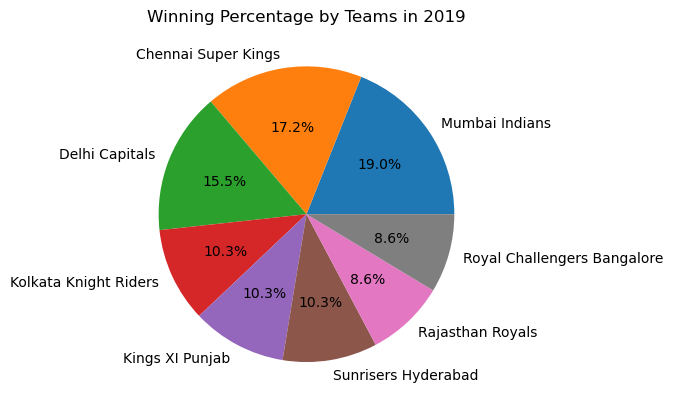

In [81]:
plt.figure()
wins.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel("")
plt.title(f"Winning Percentage by Teams in {year}")
plt.show()


The pie chart represents the distribution of wins among teams.

Bar Graph – Top 5 Teams by Wins

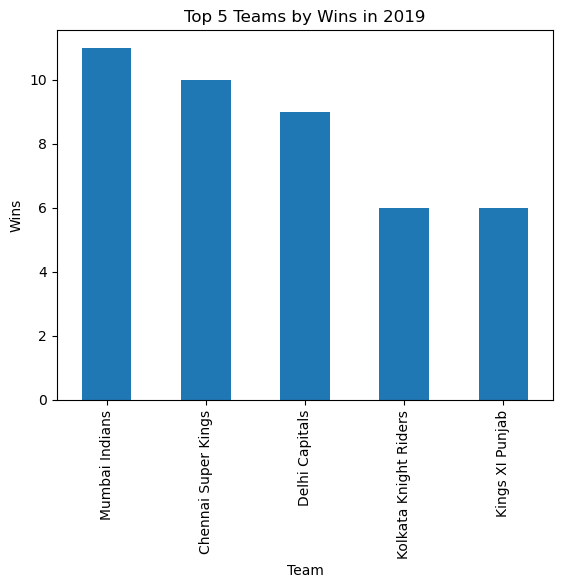

In [82]:
top5 = wins.head(5)

plt.figure()
top5.plot(kind='bar')
plt.xlabel("Team")
plt.ylabel("Wins")
plt.title(f"Top 5 Teams by Wins in {year}")
plt.show()


Histogram – Distribution of Win by Runs

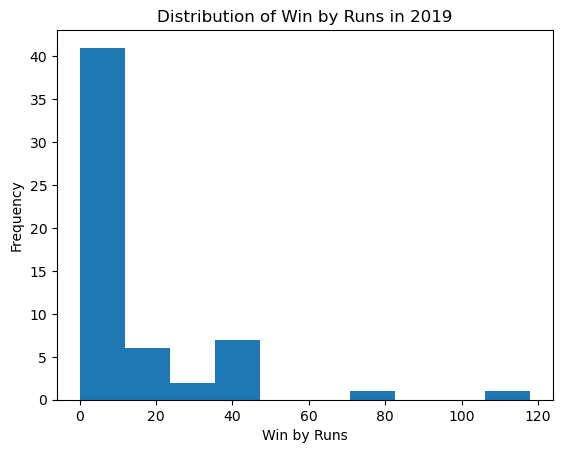

In [83]:
plt.figure()
plt.hist(df_year['win_by_runs'], bins=10)
plt.xlabel("Win by Runs")
plt.ylabel("Frequency")
plt.title(f"Distribution of Win by Runs in {year}")
plt.show()


                                      BI- VARIATE ANALYSIS

Scatter Plot – Win by Runs vs Win by Wicket

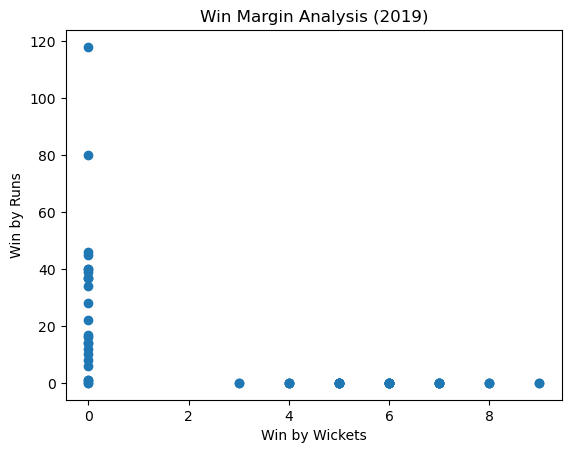

In [84]:
plt.figure()
plt.scatter(df_year['win_by_wickets'], df_year['win_by_runs'])
plt.xlabel("Win by Wickets")
plt.ylabel("Win by Runs")
plt.title(f"Win Margin Analysis ({year})")
plt.show()


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, 636 to 755
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               118 non-null    int64 
 1   season           118 non-null    int64 
 2   city             118 non-null    object
 3   date             118 non-null    object
 4   team1            118 non-null    object
 5   team2            118 non-null    object
 6   toss_winner      118 non-null    object
 7   toss_decision    118 non-null    object
 8   result           118 non-null    object
 9   dl_applied       118 non-null    int64 
 10  winner           118 non-null    object
 11  win_by_runs      118 non-null    int64 
 12  win_by_wickets   118 non-null    int64 
 13  player_of_match  118 non-null    object
 14  venue            118 non-null    object
 15  umpire1          118 non-null    object
 16  umpire2          118 non-null    object
dtypes: int64(5), object(12)
memory usage: 

In [86]:
# get dummies
df = pd.get_dummies(df, drop_first=True)
df.head()

,id,season,dl_applied,win_by_runs,win_by_wickets,city_Chennai,city_Delhi,city_Hyderabad,city_Indore,city_Jaipur,...,umpire2_Nanda Kishore,umpire2_Nigel Llong,umpire2_Nitin Menon,umpire2_O Nandan,umpire2_Rod Tucker,umpire2_S Ravi,umpire2_Ulhas Gandhe,umpire2_Vineet Kulkarni,umpire2_Virender Kumar Sharma,umpire2_Yeshwant Barde
636,7894,2018,0,0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
637,7895,2018,0,0,6,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
638,7896,2018,0,0,4,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
639,7897,2018,0,0,9,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
640,7898,2018,0,0,5,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [87]:
X = df.drop(columns =['win_by_runs','win_by_wickets'])
y = df['win_by_runs'] 
X.head()


,id,season,dl_applied,city_Chennai,city_Delhi,city_Hyderabad,city_Indore,city_Jaipur,city_Kolkata,city_Mohali,...,umpire2_Nanda Kishore,umpire2_Nigel Llong,umpire2_Nitin Menon,umpire2_O Nandan,umpire2_Rod Tucker,umpire2_S Ravi,umpire2_Ulhas Gandhe,umpire2_Vineet Kulkarni,umpire2_Virender Kumar Sharma,umpire2_Yeshwant Barde
636,7894,2018,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
637,7895,2018,0,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
638,7896,2018,0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
639,7897,2018,0,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
640,7898,2018,0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [88]:
X = pd.get_dummies(X, drop_first=True)

Train-Test Split

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [90]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(94, 257)
(24, 257)
(94,)
(24,)


In [91]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train) 


In [92]:
X_test_scaled = scaler.transform(X_test)

Build Regression Model

In [93]:
from sklearn.metrics import r2_score
import numpy as np

def regression_metrics(y_test, y_pred):
    return {
        "R2": r2_score(y_test, y_pred),
    }

In [94]:
#Aply linear regression
from sklearn.linear_model import LinearRegression
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)


LinearRegression()

In [95]:
from sklearn.metrics import r2_score
LR_acc=round(model_LR.score(X_test, y_test)*100)
LR_acc


-49

In [96]:
#svm
from sklearn.svm import SVR
model_SVR = SVR()
model_SVR.fit(X_train,y_train)


SVR()

In [97]:
from sklearn.metrics import r2_score
SVR_Accuracy=round(r2_score(y_test, model_SVR.predict(X_test)) * 100)
SVR_Accuracy

-10

In [98]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [99]:
from sklearn.metrics import r2_score
DT_acc=round(model_DT.score(X_test, y_test)*100)
DT_acc

46

In [100]:
#apply random forest model
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier()
model_RF.fit(X_train,y_train)

RandomForestClassifier()

In [101]:
from sklearn.metrics import r2_score
RF_acc=round(model_RF.score(X_test, y_test)*100)
RF_acc

79

In [102]:
# polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
from sklearn.linear_model import LinearRegression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
from sklearn.metrics import r2_score
PR_Accuracy=round(r2_score(y_test, poly_model.predict(X_test_poly)) * 100)
PR_Accuracy

-38

<Axes: >

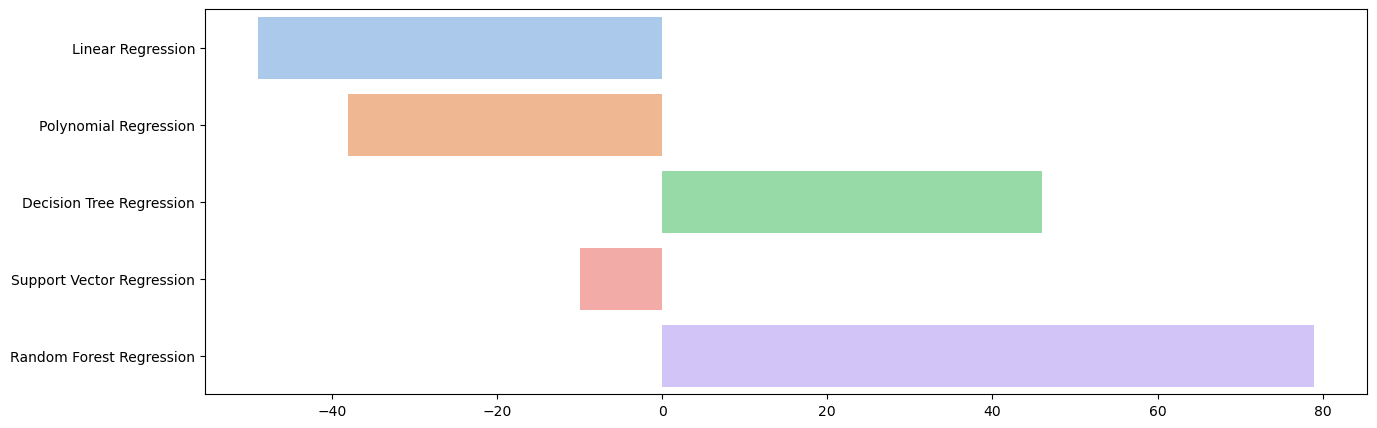

In [103]:
models = ["Linear Regression", "Polynomial Regression", "Decision Tree Regression", "Support Vector Regression", "Random Forest Regression"]
Accuracy = [LR_acc, PR_Accuracy, DT_acc, SVR_Accuracy, RF_acc]
plt.figure(figsize=(15, 5))
sns.barplot(x=Accuracy, y=models, palette='pastel')

In [104]:
X.columns

Index(['id', 'season', 'dl_applied', 'city_Chennai', 'city_Delhi',
       'city_Hyderabad', 'city_Indore', 'city_Jaipur', 'city_Kolkata',
       'city_Mohali',
       ...
       'umpire2_Nanda Kishore', 'umpire2_Nigel Llong', 'umpire2_Nitin Menon',
       'umpire2_O Nandan', 'umpire2_Rod Tucker', 'umpire2_S Ravi',
       'umpire2_Ulhas Gandhe', 'umpire2_Vineet Kulkarni',
       'umpire2_Virender Kumar Sharma', 'umpire2_Yeshwant Barde'],
      dtype='object', length=257)

                                     TO SAVE THE SCALER , MODEL AND FEATURE COLUMNS

In [105]:
# Save model, scaler, and feature columns
import pickle
pickle.dump(model_RF, open("final_model.pkl", "wb"))
pickle.dump(scaler, open("minmax_scaler.pkl", "wb"))
pickle.dump(X.columns, open("feature_columns.pkl", "wb"))

In [106]:
# Load saved objects
model = pickle.load(open("final_model.pkl", "rb"))
scaler = pickle.load(open("minmax_scaler.pkl", "rb"))
feature_columns = pickle.load(open("feature_columns.pkl", "rb"))

# User input
new_data = pd.DataFrame({
    'season': [2024],
    'dl_applied': [1],
    'city': ['Delhi']
})

In [107]:
new_data = pd.get_dummies(new_data)

In [109]:
new_data = new_data.reindex(columns=feature_columns, fill_value=0)

In [110]:
new_data_scaled = scaler.transform(new_data)
prediction = model.predict(new_data_scaled)
print("Predicted win by runs:", prediction[0])

Predicted win by runs: 0
